# Дослідження та візуалізація даних за допомогою Python

## **Мета:** отримати базові навики використання Python для дослідження та візуалізації даних.

### **Завдання 1**. Функція, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.

In [62]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime

def read_column(filename, column_name):
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        column_index = headers.index(column_name)
        return np.array([float(row[column_index]) for row in reader])

### **Завдання 2**. Створення масиву numpy зі значень стовпця «APC».

In [61]:
filename = 'data/russia_losses_equipment.csv'
apc_losses = read_column(filename, 'APC')
print(f"Втрати БТР: {apc_losses}")

Втрати БТР: [18726. 18697. 18661. 18612. 18592. 18581. 18538. 18523. 18487. 18470.
 18450. 18433. 18404. 18395. 18355. 18332. 18287. 18254. 18229. 18199.
 18175. 18111. 18072. 18053. 18002. 17969. 17939. 17895. 17876. 17827.
 17800. 17765. 17751. 17740. 17710. 17679. 17658. 17627. 17596. 17579.
 17547. 17503. 17476. 17438. 17396. 17344. 17304. 17292. 17252. 17222.
 17170. 17132. 17093. 17080. 17077. 17071. 17063. 17043. 17003. 16955.
 16938. 16925. 16906. 16897. 16878. 16878. 16869. 16848. 16821. 16786.
 16760. 16736. 16722. 16699. 16681. 16667. 16648. 16631. 16620. 16599.
 16567. 16542. 16521. 16495. 16480. 16473. 16461. 16426. 16402. 16385.
 16368. 16363. 16350. 16341. 16332. 16323. 16294. 16286. 16255. 16238.
 16211. 16203. 16161. 16141. 16103. 16095. 16074. 16050. 16039. 16013.
 16000. 15980. 15963. 15917. 15902. 15883. 15871. 15862. 15826. 15811.
 15779. 15755. 15732. 15715. 15704. 15685. 15645. 15629. 15611. 15600.
 15583. 15566. 15550. 15524. 15505. 15480. 15459. 15450. 15431. 1

### **Завдання 3.** Добові втрати БТР.

In [60]:
daily_losses = np.diff(apc_losses)
print(daily_losses)

[ -29.  -36.  -49.  -20.  -11.  -43.  -15.  -36.  -17.  -20.  -17.  -29.
   -9.  -40.  -23.  -45.  -33.  -25.  -30.  -24.  -64.  -39.  -19.  -51.
  -33.  -30.  -44.  -19.  -49.  -27.  -35.  -14.  -11.  -30.  -31.  -21.
  -31.  -31.  -17.  -32.  -44.  -27.  -38.  -42.  -52.  -40.  -12.  -40.
  -30.  -52.  -38.  -39.  -13.   -3.   -6.   -8.  -20.  -40.  -48.  -17.
  -13.  -19.   -9.  -19.    0.   -9.  -21.  -27.  -35.  -26.  -24.  -14.
  -23.  -18.  -14.  -19.  -17.  -11.  -21.  -32.  -25.  -21.  -26.  -15.
   -7.  -12.  -35.  -24.  -17.  -17.   -5.  -13.   -9.   -9.   -9.  -29.
   -8.  -31.  -17.  -27.   -8.  -42.  -20.  -38.   -8.  -21.  -24.  -11.
  -26.  -13.  -20.  -17.  -46.  -15.  -19.  -12.   -9.  -36.  -15.  -32.
  -24.  -23.  -17.  -11.  -19.  -40.  -16.  -18.  -11.  -17.  -17.  -16.
  -26.  -19.  -25.  -21.   -9.  -19.  -18.  -15.  -15.  -11.  -35.  -18.
  -12.  -20.  -18.   -6.  -29.  -26.  -21.  -11.  -32.  -13.  -26.   -9.
  -20.  -40.  -16.  -18.  -22.  -33.  -12.  -22.  -

### **Завдання 4.** 5 найбільших добових втрат БТР.

In [59]:
top_5_losses = -np.sort(-daily_losses)[-5:]
print(top_5_losses)

[ -91.  -96. -110. -120. -190.]


### **Завдання 5**. Кількість БТР, знищених влітку 2023 року.

In [58]:
summer_2023_losses = summer_losses_vectorized(filename, 'date', 'APC')
print(summer_2023_losses)

-1126.0


### **Завдання 6.** Середнє значення знищених БТР за 100-500 днів війни.

In [57]:
mean_losses_100_500 = np.mean(apc_losses[100:501])
print(mean_losses_100_500)

11633.032418952618


### **Завдання 7.** Графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних).

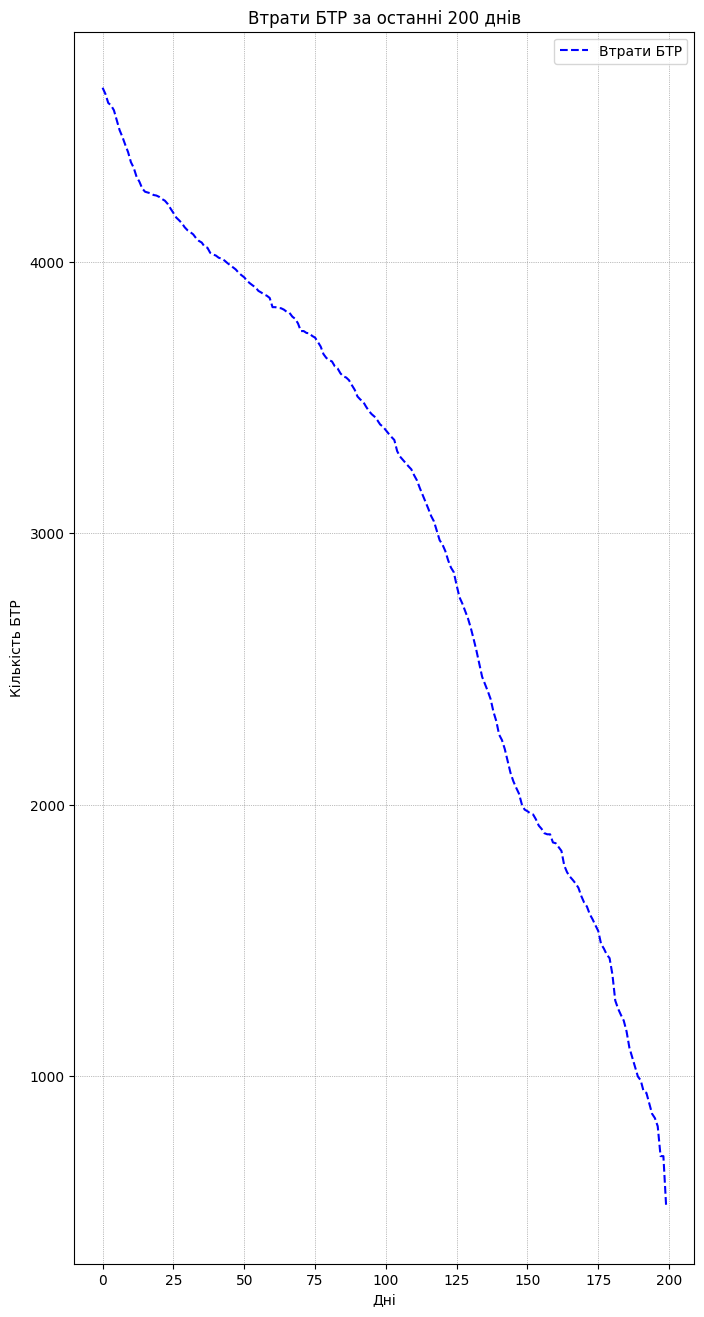

In [54]:
def plot_last_200_days(apc_losses):
    last_200_days = apc_losses[-200:]  # Зріз для останніх 200 днів
    days = np.arange(len(last_200_days))  # Вектор днів
    
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(days, last_200_days, linestyle='--', color='blue', label='Втрати БТР')
    plt.title('Втрати БТР за останні 200 днів')
    plt.xlabel('Дні')
    plt.ylabel('Кількість БТР')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.legend()
    plt.savefig('apc_losses_last_200_days.png')
    plt.show()

plot_last_200_days(apc_losses)